In [1]:
# 머신러닝 1-1 데이터 탐색, EDA 
# 머신러닝 1-2 이상치 식별하고 처리
# 머신러닝 1-3 앞선 두단계에서 발견한 향후 분석시에 고려해야할 사항 작성
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df1=pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/diabetes_for_test.csv")


In [2]:
diabetes=df1.groupby('Outcome').mean()

Text(0.5, 0.98, 'EDA')

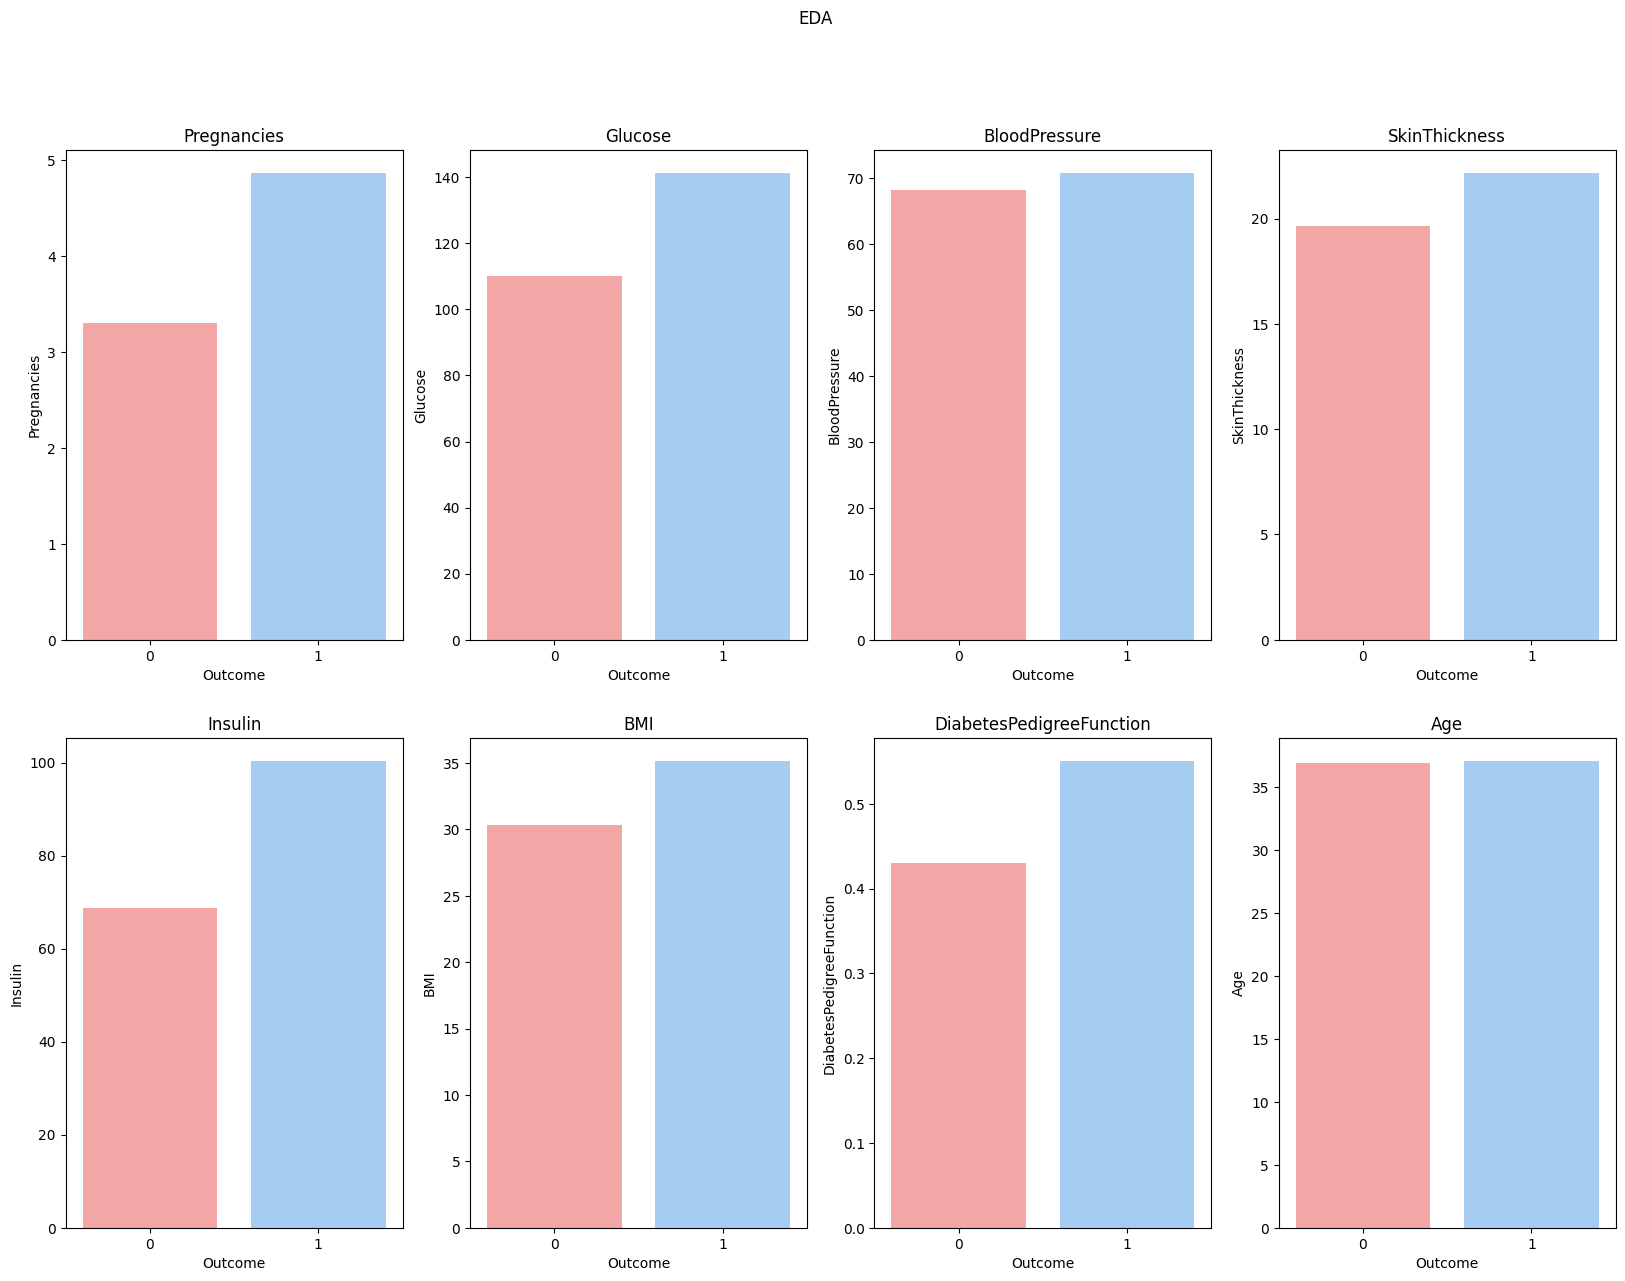

In [3]:
# sns.barplot(data=df, x="class", y="fare", hue="sex", estimator='mean')
# plt.show()

fig,ax=plt.subplots(2,4,figsize=(20,14))
for i in range(4):
    sns.barplot(x=diabetes.index,y=diabetes.iloc[:,i],ax=ax[0][i],palette=["#FF9999", "#99CCFF"])
    ax[0][i].set_title(diabetes.columns[i])
for i in range(4):
    sns.barplot(x=diabetes.index,y=diabetes.iloc[:,i+4],ax=ax[1][i],palette=["#FF9999", "#99CCFF"])
    ax[1][i].set_title(diabetes.columns[i+4])
plt.suptitle('EDA')

   VIF_Factor                   Feature
0    3.282056               Pregnancies
1   20.610540                   Glucose
2   28.240973             BloodPressure
3    3.895457             SkinThickness
4    2.112088                   Insulin
5   21.209367                       BMI
6    3.195293  DiabetesPedigreeFunction
7   14.428149                       Age


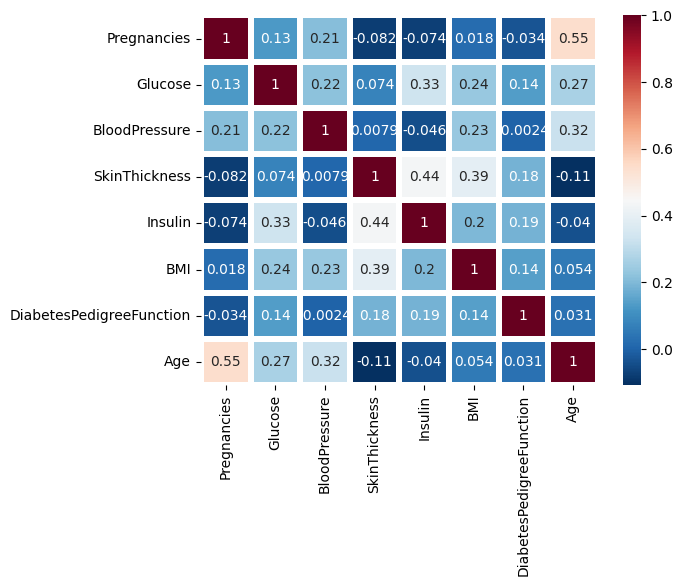

In [ ]:
import seaborn as sns
df_cor= df1.drop(columns=['Outcome']).corr(method='pearson')
sns.heatmap(df_cor, xticklabels=df_cor.columns,yticklabels=df_cor.columns,
        cmap='RdBu_r',annot=True,linewidths=3)
# 0.9 이상 상관관계를 가지는 변수는 없다. 다중공선성이 없어 보인다.
# 다중공선성 체크
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train = df1.drop(columns=['Outcome'])

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
                        for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   36.980469    0.348958  
std      7.884160                  0.331329   61.404453    0.476951  
min      0.000000                  

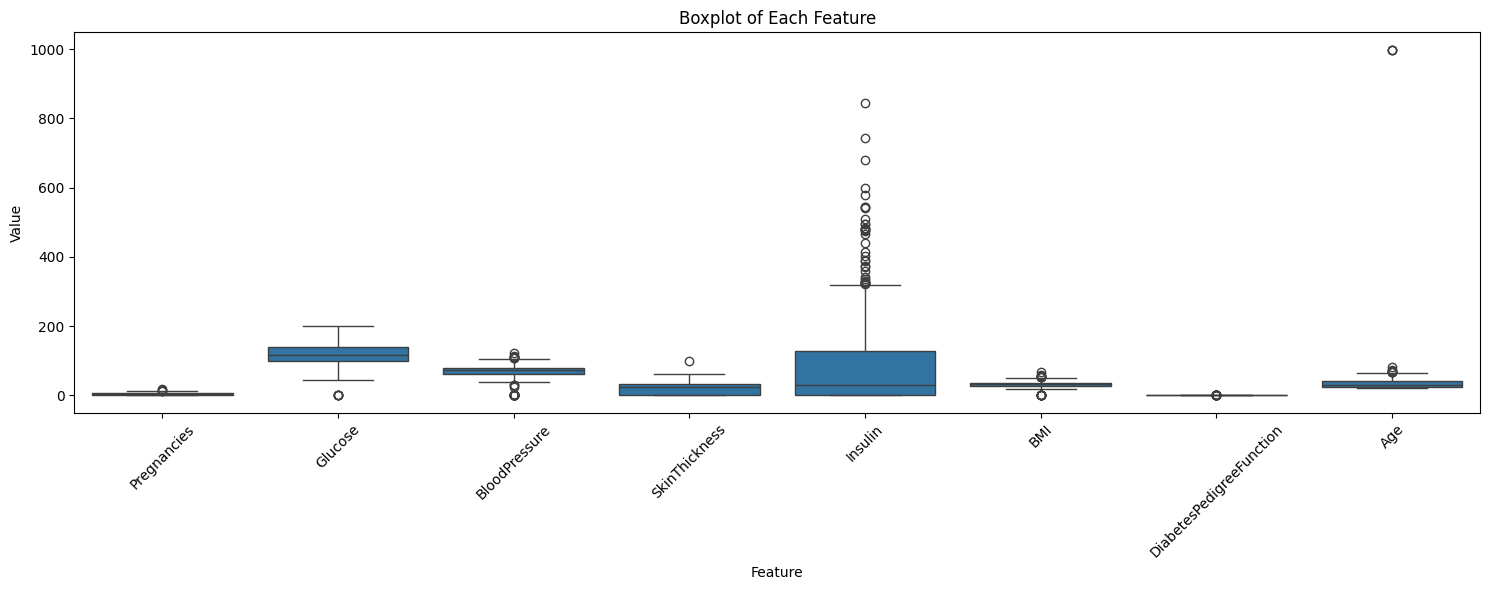

In [5]:
# 1-2 이상치 식별
print(df1.describe()) # std 
print(df1.isna().sum())
# for i in df1.columns.tolist():
# Outcome은 제외하고 수치형 컬럼만 대상으로 melt
df_melted = df1.drop(columns='Outcome').melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(15, 6))
sns.boxplot(data=df_melted, x='Feature', y='Value')
plt.xticks(rotation=45)
plt.title("Boxplot of Each Feature")
plt.tight_layout()
plt.show()

AGE 이상치 29.0


<Axes: ylabel='Age'>

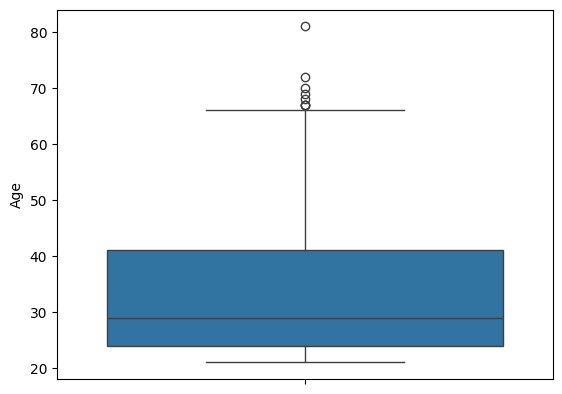

In [6]:
# age가 눈에 띄는 이상 치가 존재하고 인슐린은 이어져 있어서 실제 이상치인지 판단 이 안됨., age쪽만 이상치 처리
print("AGE 이상치", df1.Age.median())
outlier_index=df1[df1['Age']>400].index
df1.loc[outlier_index,'Age']=df1.Age.median()
sns.boxplot(df1["Age"])

In [7]:
#추가적으로  clucucose , bloodpressure는 0이 없어야함다
outlier_index =df1[df1['Glucose']==0].index
df1.loc[outlier_index,'Glucose']=df1.Glucose.median()
outlier_index =df1[df1['BloodPressure']==0].index
df1.loc[outlier_index,'BloodPressure']=df1.BloodPressure.median()
df1.describe()
# 그럼에도 불구하고 스케일링 해야함

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,20.536458,79.799479,31.992578,0.471876,33.191406,0.348958
std,3.369578,30.438286,12.096642,15.952218,115.244002,7.884160,0.331329,11.683509,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# 머신러닝 2-1 업샘플링과정을 설명하고 결과 
# 데이터 불균형 극복 소수 레이블을 늘림
# 랜덤 샘플링, 소수 클래서 관측치 복사, 소수클래스의 오버피팅될수 있지만 간단하다.
# SMOTE,  적은 데이터 세트의 k 최근접점을  이웃을 찾아 k 개 이웃들과 차이를 일정한 값을 만들어 기존 데이터와 약간의 지닌 데이터 생성
# ✅ SMOTE 핵심 알고리즘 요약
# 소수 클래스(예: label=1)의 샘플 중 하나 A를 선택
# A에서 가장 가까운 k개의 소수 클래스 이웃 B₁, B₂, ..., Bₖ 중 하나를 랜덤하게 선택
# A와 B 사이의 선형 보간을 통해 새로운 샘플 S를 생성S=A+δ⋅(B−A),δ∼U(0,1)
# 느리지만, 과적합 예방
# 데이터 불균형 확인
df1['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

X=df1.drop('Outcome',axis=1)
y=df1[['Outcome']]

ros=RandomOverSampler()
X_upsample , Y_upsample = ros.fit_resample(X,y)
print('기존 타깃 분포')
print(df1['Outcome'].value_counts()/len(df1))
print('upsample')
print(Y_upsample.value_counts()/len(Y_upsample))


기존 타깃 분포
Outcome
0    0.651042
1    0.348958
Name: count, dtype: float64
upsample
Outcome
0          0.5
1          0.5
Name: count, dtype: float64


In [10]:
X=df1.drop('Outcome',axis=1)
y=df1[['Outcome']]

ros=SMOTE()
X_upsample , Y_upsample = ros.fit_resample(X,y)
print('기존 타깃 분포')
print(df1['Outcome'].value_counts()/len(df1))
print('upsample')
print(Y_upsample.value_counts()/len(Y_upsample))



기존 타깃 분포
Outcome
0    0.651042
1    0.348958
Name: count, dtype: float64
upsample
Outcome
0          0.5
1          0.5
Name: count, dtype: float64


In [11]:
#2-2 언더 샘플링 과정을 설명하고 결과를 작성하시오
# 랜덤 언더 샘플링 , 대표적으로 다수 클클래스를 선태갛여 삭제하는 
# 토멕링크 , 서로 다른 클래스가 있을때 서로 다른 클래스에 가장가까운 데이터들이 도멕 링크로 묶어서 도멕링크 중 다수 클러스터의 데이터를 제거하는 토멕링크

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

rus= RandomUnderSampler()
X_under,Y_under = rus.fit_resample(X,y)
print('기존')
print(df1['Outcome'].value_counts())
print('undersampling')
print(Y_under['Outcome'].value_counts()/len(Y_under))

# 768개 전체 데이터 셋도 작기 때문에 언더샘플링보다 오버샘플링을 하는게 오버피팅이 덜하게 됨


기존
Outcome
0    500
1    268
Name: count, dtype: int64
undersampling
Outcome
0    0.5
1    0.5
Name: count, dtype: float64


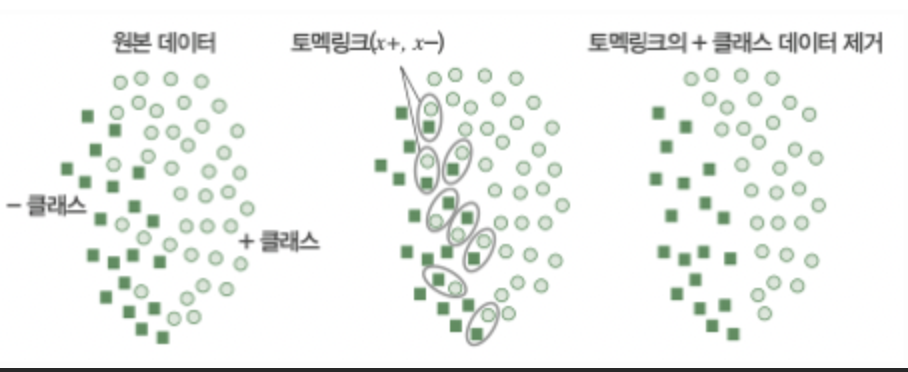

In [12]:
#머신러닝 3 당뇨병환자를 예측하는 최소 3개 이상 알고리즘을 젯기하고 정확도 측면에서 모델 1개와 속도 측면의 모델 1개를 제시하시오
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

log=LogisticRegression()
xgb= XGBClassifier(random_state=0)
svm=SVC(kernel='linear',C=0.1)

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import time
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
smote=SMOTE(random_state=0)
kfold=KFold()#데이터가 작기때문에 홀드 아웃이 아니라 케이 폴드로 
def model_result(model):
    pred_li=[]
    for train_index,test_index in kfold.split(X):
        X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
        Y_train,Y_test=y.iloc[train_index,:],y.iloc[test_index,:]

        X_train_re,Y_train_re= smote.fit_resample(X_train,Y_train)
        scaler=StandardScaler()
        start=time.time()
        model.fit(scaler.fit_transform(X_train_re),Y_train_re)
        end=time.time()

        pred=model.predict(scaler.transform(X_test))
        pred_li.append(accuracy_score(Y_test['Outcome'],pred))
    print("time",end-start)
    print("mean_acc",np.mean(pred_li))

model_result(log)
model_result(xgb)
model_result(svm)

time 0.0018630027770996094
mean_acc 0.763127069009422
time 0.16823196411132812
mean_acc 0.743519225872167
time 0.005808115005493164
mean_acc 0.7618198794669383


In [14]:
#머신러닝4 속도 개선을 위한 차원 축소 방법을 설명하고 수행하시오 그리고 예측 성능과 속도를 비교하고 결과를 작성하시오
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

smote= SMOTE(random_state=0)
X_train,X_test,Y_train,Y_test= train_test_split(X,y,stratify=y,test_size=0.3,random_state=2022)
scaler=StandardScaler()
X_train_s=scaler.fit_transform(X_train)
pca=PCA(n_components=8)
X_train_pca=pca.fit(X_train_s)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:5].sum())


def model_result(model):
    pred_li=[]
    for train_index,test_index in kfold.split(X):
        X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
        Y_train,Y_test=y.iloc[train_index,:],y.iloc[test_index,:]

        X_train_re,Y_train_re= smote.fit_resample(X_train,Y_train)
        scaler=StandardScaler()
        start=time.time()
        model.fit(pca.transform(scaler.fit_transform(X_train_re))[:,:5],Y_train_re)
        end=time.time()

        pred=model.predict(pca.transform(scaler.transform(X_test))[:,:5])
        pred_li.append(accuracy_score(Y_test['Outcome'],pred))
    print("time",end-start)
    print("mean_acc",np.mean(pred_li))

model_result(log)
model_result(xgb)
model_result(svm)


[0.26110315 0.22613628 0.12025873 0.10650649 0.1016306  0.08197042
 0.05251497 0.04987936]
0.8156352463546329
time 0.001744985580444336
mean_acc 0.7279263220439691
time 0.17152619361877441
mean_acc 0.6953144894321365
time 0.005126953125
mean_acc 0.714939309056956


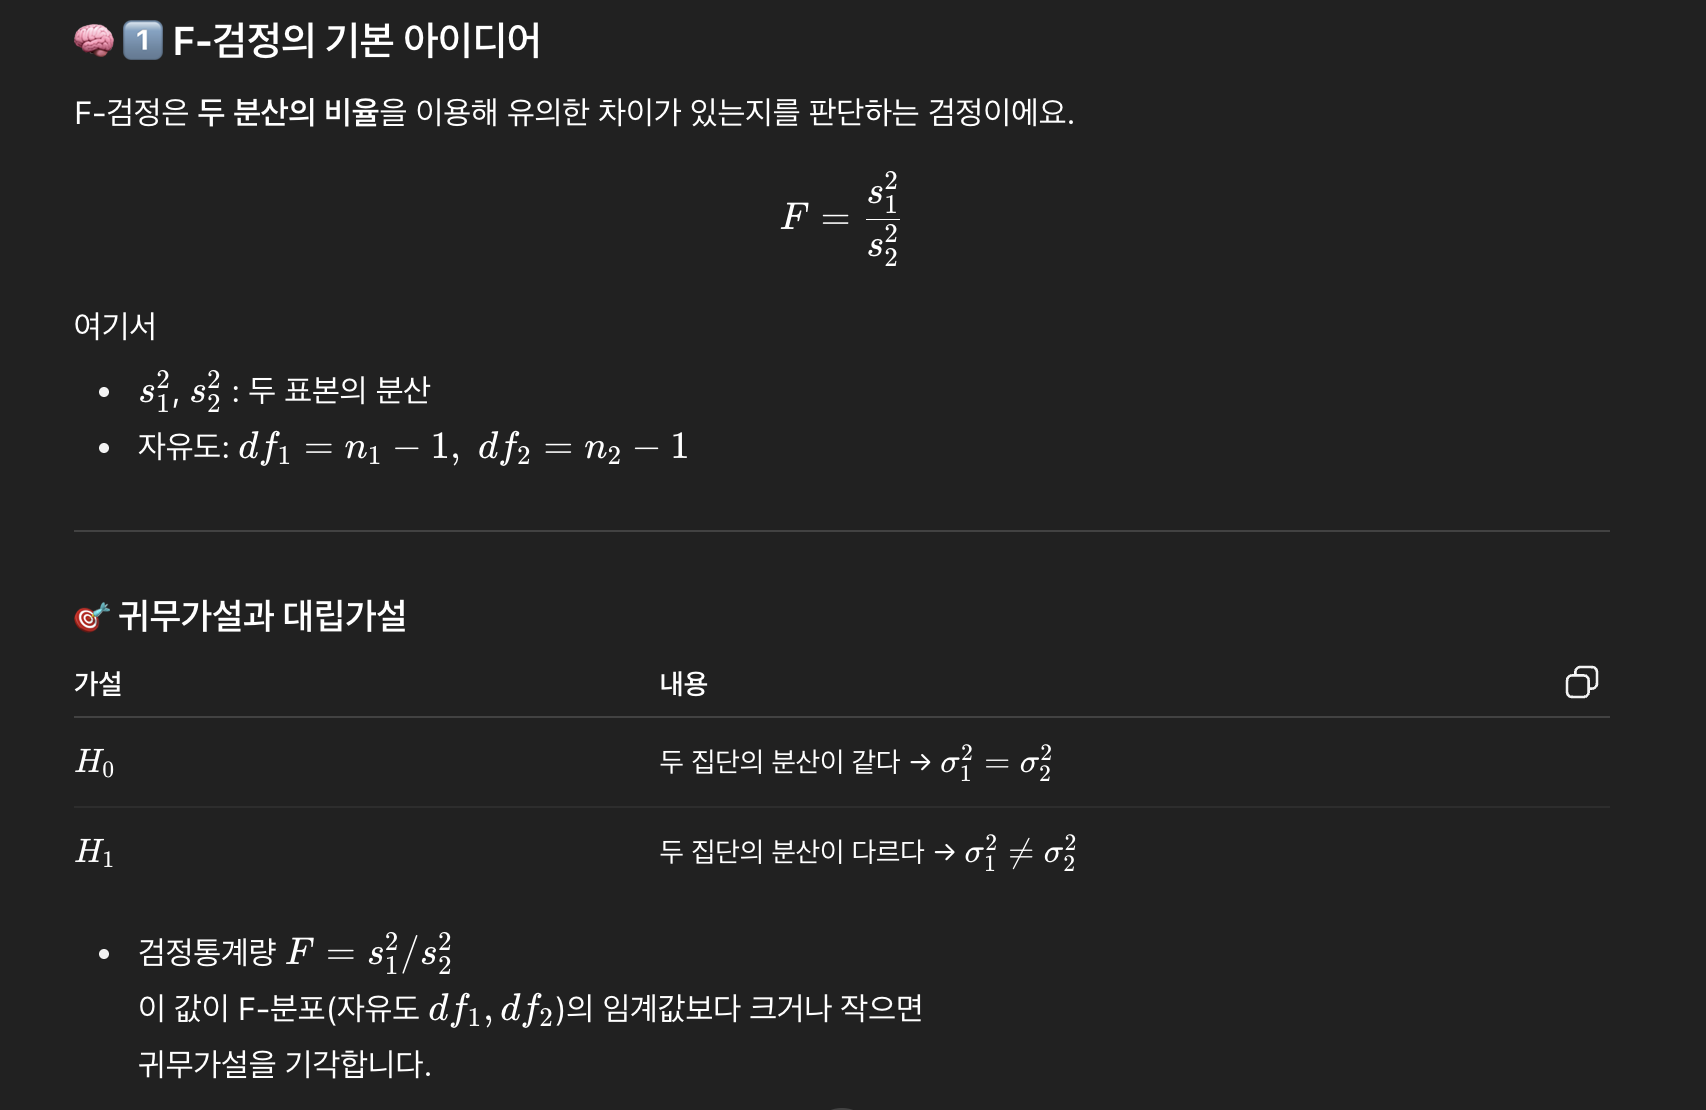

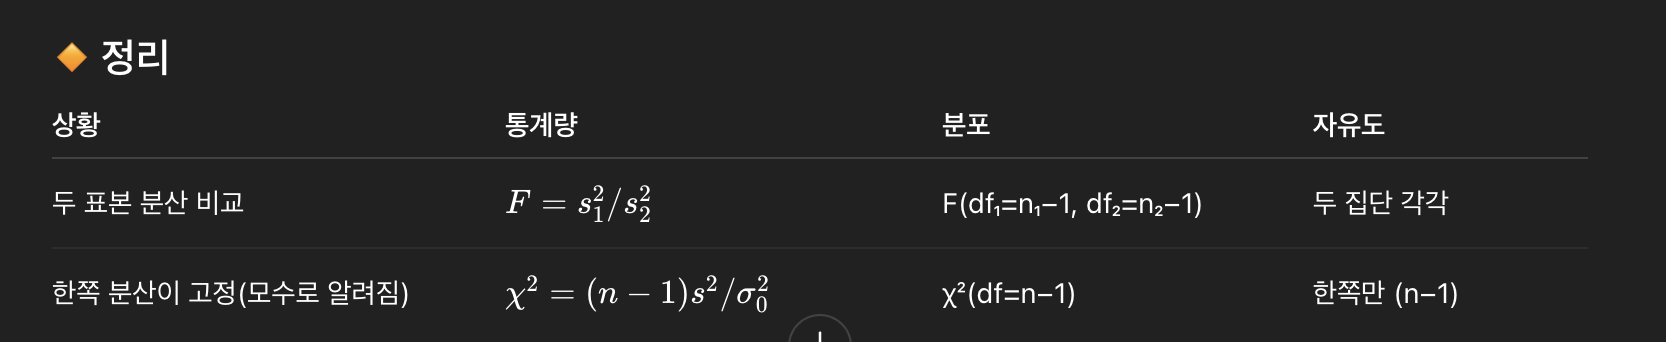

In [ ]:
#통게 1-1 회사 제품의 금속 재질의 함유량의 분산이 1.3 을 넘으면 불량이라고 판단한다. 회사에서는 품질경영팀으로부터 제조사별로
#금속 함유량이 차이가 난다고 제보를 받았다. 해당 금속 함유량 데이터에 대한 검정을 수행하시오 
# H0: 제품의 금속 재질 함유량 분산은 1.3 보다 크다
# H1: 제품의 금속 재질 함유량 분산은 1.3 보다 작다
import pandas as pd
import numpy as np
df= pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/metalicity")
import scipy.stats as stats
print(stats.shapiro(df['metalicity']))#p가 0.05보다 크니깐 정규성을 가지고 있다.  티테스트 가능
# variance_to_test=1.3 
# df['metalicity_s2']=(df['metalicity']-df['metalicity'].mean())**2
# test_statistics,p_value=stats.ttest_1samp(df['metalicity_s2'],popmean=variance_to_test, alternative='greater')
# print("검정 통계량 ", test_statistics)
# print("p_value", p_value) # 기각하지 못한다. 


# # 표본 분산 계산 -> 두개가 다를때, 정규 비정규시 Levene test
# s1_sq = np.var(df['metalicity'], ddof=1)
# s2_sq = np.var(df['metalicity'], ddof=1)

# # F 통계량 계산
# F = s1_sq / s2_sq

# # 자유도
# df1 = len(group1) - 1
# df2 = len(group2) - 1

# # 양측 검정 p-value
# p_value = 2 * min(stats.f.cdf(F, df1, df2), 1 - stats.f.cdf(F, df1, df2))

# print(f"F-statistic: {F:.3f}")
# print(f"p-value: {p_value:.4f}")
# 🧠 Levene 검정 기본 개념
# 귀무가설 모든 집단의 분산이 같다.
# 대립가설 적어도 한 집단의 분산이 다르다.
# # 예시 데이터 (3그룹)
# group1 = [9.1, 8.7, 9.3, 8.9, 9.0]
# group2 = [9.5, 9.8, 9.6, 9.4, 9.9]
# group3 = [8.8, 9.0, 9.2, 8.9, 9.1]

# # Levene 검정 수행
# stat, p_value = stats.levene(group1, group2, group3, center='median')

# print(f"Levene statistic: {stat:.4f}")
# print(f"p-value: {p_value:.4f}")

# if p_value < 0.05:
#     print("❌ 귀무가설 기각: 집단 간 분산이 다릅니다.")
# else:
#     print("✅ 귀무가설 채택: 분산이 통계적으로 동일합니다.")


# data = [9.1, 8.7, 9.3, 8.9, 9.0]
s2_fixed = 1.3  # 알려진 모분산
n = len(df['metalicity'])

# 표본 분산
s_sq = np.var(df['metalicity'], ddof=1)

# 카이제곱 검정통계량
chi2 = (n - 1) * s_sq / s2_fixed

# 자유도
df = n - 1

# p-value (양측)
p_value = 2 * min(stats.chi2.cdf(chi2, df), 1 - stats.chi2.cdf(chi2, df))
# 작을경우
p_value = stats.chi2.cdf(chi2, df)
#클경우 # 단측 검정 (H1: σ² > 1.3)
# p_value = 1 - stats.chi2.cdf(chi2, df)
print(f"std: {s_sq}, χ²-statistic: {chi2:.3f}, df={df}, p-value={p_value:.4f}")

ShapiroResult(statistic=0.9822470545768738, pvalue=0.0500236377120018)
검정 통계량  -7.121703494774584
p_value 0.999999999978898
std: 0.7432009850287774, χ²-statistic: 85.182, df=149, p-value=0.0000


In [23]:
#통계 2 제품 200개의 lot 별 불량 제품 수량 데이터에 대해 p 관리도를 구하고 시각화 하시오
#p 관리도는 n 랏별 생산수량
# p  lot 별  불량 수량
# CL  중심관리선  전체 불량 수량/ 전체 생산 수량
# 관리 상하한 선 p+- 3*sqrt(p(1-p)/n)
df2= pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/lot_quality.csv")
df2=df2.set_index('lot')

In [24]:
df2.head(2)

,생산수량,불량수량
lot,,
1,587,19
2,588,15


In [25]:
df2['p']= df2['불량수량']/df2['생산수량']
df2['ucl']= df2["p"]+3*np.sqrt((df2["p"]*(1-df2["p"]))/df2["생산수량"])
df2['lcl']= df2["p"]-3*np.sqrt((df2["p"]*(1-df2["p"]))/df2["생산수량"])
CL=df2["불량수량"].sum()/df2["생산수량"].sum()
print("관리 중심선",CL)

관리 중심선 0.029024320840935338


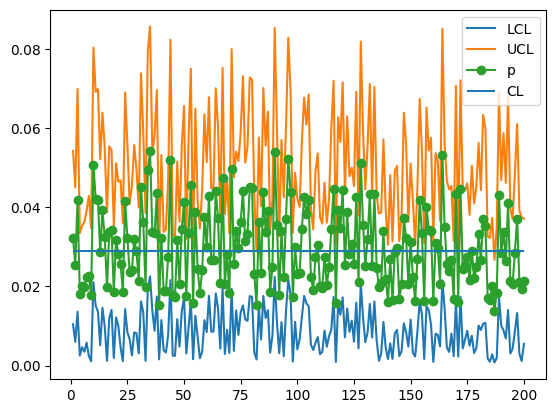

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df2["lcl"])
plt.plot(df2["ucl"])
plt.plot(df2["p"],marker='o')
plt.hlines(CL,1,200)
plt.legend(['LCL','UCL',"p","CL"])

In [ ]:
#통계 3 제품 1,2를 만드는데 재료 abc 일부가 사용되며 제품 1과 2를 만들때 12만원과 18만원을 벌수 있다. 재료는 한정적으로 주어지는데 이때 최대 수익을 낼 수 있을 때의 제품 1, 
# 제품2의 개수를 구해라
# 제품공급량 a 1300 b 1000 c 1200
# 구분 재료 a 재료 b 재료 c
# 제품 1  20  20 20
# 제품 2  40  30 30

# pip install scipy
from scipy.optimize import linprog
import numpy as np

# 예시 문제
# maximize  3x1 + 5x2
# subject to
#   2x1 +  x2 <= 10
#    x1 + 3x2 <= 12
#   x1, x2 >= 0

# linprog는 최소화만 지원하므로, 최대화는 계수에 -1을 곱합니다.
c = np.array([-3, -5])                   # maximize -> minimize of negative
A_ub = np.array([[2, 1],
                [1, 3]])                # <= 제약 -> 제약식은 모두 “≤ 형태”로 바꿔줘야 합니다.
b_ub = np.array([10, 12])
bounds = [(0, None), (0, None)]          # x1>=0, x2>=0

res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs")

if res.success:
    x1, x2 = res.x
    z = -res.fun                          # 다시 부호 복원(최대화 값)
    print(f"Optimal x: {res.x}")
    print(f"Optimal value: {z}")
else:
    print("Infeasible or unbounded:", res.message)


Optimal x: [3.6 2.8]
Optimal value: 24.800000000000004


In [ ]:
# pip install scipy
from scipy.optimize import linprog
import numpy as np

# 변수: x1, x2
# maximize 12*x1 + 18*x2  -> linprog는 최소화만 지원 → 부호 반전
c = np.array([-12, -18])

# 자원 제약 Ax <= b
A_ub = np.array([
    [20, 40],  # a
    [20, 30],  # b
    [20, 30],  # c
], dtype=float)
b_ub = np.array([1300, 1000, 1200], dtype=float)

# x1, x2 >= 0
bounds = [(0, None), (0, None)]

res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs")

if res.success:
    x1, x2 = res.x
    profit = -res.fun
    print(f"x1 = {x1:.6g}, x2 = {x2:.6g}")
    print(f"최대 수익 = {profit:.6g} (만원)")
    # 자원 사용량 확인
    use_a = 20*x1 + 40*x2
    use_b = 20*x1 + 30*x2
    use_c = 20*x1 + 30*x2
    print(f"use(a,b,c) = {use_a:.6g}, {use_b:.6g}, {use_c:.6g}")
else:
    print("Infeasible or unbounded:", res.message)


x1 = 50, x2 = 0
최대 수익 = 600 (만원)
use(a,b,c) = 1000, 1000, 1000


In [ ]:
# 통계 4 : 상품 a 와 상품 b 가 있을때 다음의 구매 패턴이 있다 한다.

a='a'
b='b'
data=[a,a,b,b,a,a,a,a,b,b,b,b,b,a,a,b,b,a,b,b]
# 귀무가설 연속적인 관측값이 읨의적이다. 즉 연관성이 없다.
# 대립가설 연속적인 관측값이 임의 적 아이다. 연관성이 있다
import pandas as pd

test_df=pd.DataFrame(data,columns=['product'])

test_df.loc[test_df['product']=='a','product']=1
test_df.loc[test_df['product']=='b','product']=0

from statsmodels.sandbox.stats.runs import runstest_1samp

runstest_1samp(test_df['product'])
#관측된런수가기대값보다약간적음
# 패턴이 연관성이 없다.
# p>0.05-귀무가설채택-데이터는무작위적일가능성이높

(-1.1144881152070183, 0.26506984027306035)